# **Mobile Marketing Campaigns: Return On Ad Spend (ROAS)**
### An exploratory marketing data analysis to monitor and evaluate the performance of the mobile marketing campaigns (EDA)

The dataset contains information collected during the 1 month since each activation, of some marketing campaigns (Vungle and Facebook partners), implemented to get users to install and try out a mobile application, specifically an online game for Android and iOS smartphones.

**The goal is to determine the overall performance and monitor the return on ads spend (ROAS) along the period of analysis delivering updates insights to the marketing department.**

### **The dataset**
- Media Source (the name of the advertising partner) 
- Campaign Name (the name of the advertising campaign, given by us)
- Cost (the spend on marketing)
- Installs (the number of installs generated)
- D01 Total Revenue 
- D03 Total Revenue
- D07 Total Revenue
- D30 Total Revenue

The Dx Total Revenue is the total revenue generated within the first x days after the install from users who installed as a direct response to a specific marketing campaign.   

---

### **KPIs to calculate**
- CPI (Cost Per Install)
- Dx ROAS (Return On Advertising Spend) with x = [1, 3, 7, 30]

---

### **Business Questions**
##### Q1. Are there more Vungle or Facebook campaigns?
##### Q2. Which partner's campaign has generated more user installs?
##### Q3. Of how much is the overall CPI of Facebook?
##### Q4. How many Facebook campaigns have provided installs above the average?
##### Q5. Of how much is the overall CPI of Vungle?
##### Q6. How many Vungle campaigns have provided installs above the average?
##### Q7. Do both platforms have similar performance (cost vs. install)?
##### Q8. Of how much is the overall D30  ROAS of Facebook?
##### Q9. Of how much is the overall D30 ROAS of Vungle?
##### Q10. Overall Cost vs. D30_ROAS comparison of both platforms
##### Q11. Is there any correlation between the stages during the campaigns?
##### Q12. The campaigns with the highest ROAS have the highest Total Revenue?
##### Q13. Do the campaigns with a ROAS on DAY_1 under 10% break-even after the first month?
##### Q14. Is it safe to assume the campaigns with a ROAS on DAY_7 higher than 70% will break even after 30 days?
##### Q15. Monitoring the overall ROAS evolution of both platforms

---
##### Date: April 2021
##### Marketing Data Analyst: Gonçalo Guimarães Gomes
##### Email: goncaloggomes@gmail.com
##### Language and softwares: Python 3 (Anaconda Navigator) and Excel (Microsoft)

* * *
---

In [1]:
# Import requested libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Load the dataset
df = pd.read_csv("mkt_ua_campaigns.csv", sep=";")

In [3]:
# Number of observations and columns
print(f"Number of rows:     {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of rows:     89
Number of features: 8


In [4]:
df.head(15) # Print the first 5 rows

,Media Source,Campaign Name,Cost,Installs,D01 Total Revenue,D03 Total Revenue,D07 Total Revenue,D30 Total Revenue
0,Facebook,IMT-FB-iOS-EN-US-AE-Playables,"$99,061","21,382","$10,404","$25,694","$39,231","$74,185"
1,Vungle,IMT-Vungle-Android-US,"$38,479",50858,"$3,632","$9,679","$15,095","$26,216"
2,Vungle,IMT-Vungle-iOS-CN,"$38,209",41000,"$8,537","$20,598","$31,850","$55,175"
3,Facebook,IMT-FB-Android-RoW2-AE-Playables-FANRW,"$34,746","55,891","$4,360","$10,565","$16,080","$29,437"
4,Facebook,IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,"$31,662","19,196","$3,952","$9,824","$14,728","$26,026"
5,Facebook,IMT-FB-Android-EN2-AE-Value-Playables-FANIS,"$22,042","3,265","$2,436","$7,449","$11,112","$19,517"
6,Facebook,IMT-FB-Android-EN2-AE-Playables-FANRW,"$20,704","4,917","$1,812","$4,994","$8,081","$15,087"
7,Facebook,IMT-FB-iOS-EN-T1-AE-Playables,"$19,275","6,769","$1,876","$4,772","$7,812","$14,826"
8,Facebook,IMT-FB-iOS-CHS-AE-Playables,"$15,510","3,886","$2,281","$5,370","$7,943","$11,948"
9,Vungle,IMT-Vungle-iOS-AU,"$14,645",16358,"$1,351","$3,603","$5,761","$11,386"


In [5]:
df.isnull().sum() # Checking for missing values

Media Source         0
Campaign Name        0
Cost                 0
Installs             0
D01 Total Revenue    0
D03 Total Revenue    0
D07 Total Revenue    0
D30 Total Revenue    0
dtype: int64

In [6]:
# Lowering columns' capital letters for easy typing
df.columns = map(str.lower, df.columns)

In [7]:
# Selecting columns and cleaning unvalid characters
cols= ["cost","installs","d01 total revenue","d03 total revenue","d07 total revenue","d30 total revenue"]

df[cols] = (df[cols].replace({',':''}, regex=True))
df["cost"] = (df["cost"].str.replace('$','')).str.strip()

df["d01 total revenue"] = (df["d01 total revenue"].str.replace('$','')).str.strip()
df["d03 total revenue"] = (df["d03 total revenue"].str.replace('$','')).str.strip()
df["d07 total revenue"] = (df["d07 total revenue"].str.replace('$','')).str.strip()
df["d30 total revenue"] = (df["d30 total revenue"].str.replace('$','')).str.strip()

In [8]:
# Transforming columns as float (numeric type)
df[cols] = df[cols].astype(float).copy()

### Datatypes

In [9]:
# Checking columns types
df.dtypes

media source          object
campaign name         object
cost                 float64
installs             float64
d01 total revenue    float64
d03 total revenue    float64
d07 total revenue    float64
d30 total revenue    float64
dtype: object

In [10]:
df.head()

,media source,campaign name,cost,installs,d01 total revenue,d03 total revenue,d07 total revenue,d30 total revenue
0,Facebook,IMT-FB-iOS-EN-US-AE-Playables,99061.0,21382.0,10404.0,25694.0,39231.0,74185.0
1,Vungle,IMT-Vungle-Android-US,38479.0,50858.0,3632.0,9679.0,15095.0,26216.0
2,Vungle,IMT-Vungle-iOS-CN,38209.0,41000.0,8537.0,20598.0,31850.0,55175.0
3,Facebook,IMT-FB-Android-RoW2-AE-Playables-FANRW,34746.0,55891.0,4360.0,10565.0,16080.0,29437.0
4,Facebook,IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,31662.0,19196.0,3952.0,9824.0,14728.0,26026.0


### Final dataset

In [11]:
# Operations to create "Cost Per Install" and "dx_roas" columns
df["cpi"] = df.apply(lambda x: x["cost"] / x["installs"], axis=1)

df["d01_roas"] = df.apply(lambda x: x["d01 total revenue"] / x["cost"], axis=1)
df["d03_roas"] = df.apply(lambda x: x["d03 total revenue"] / x["cost"], axis=1)
df["d07_roas"] = df.apply(lambda x: x["d07 total revenue"] / x["cost"], axis=1)
df["d30_roas"] = df.apply(lambda x: x["d30 total revenue"] / x["cost"], axis=1)

df.head() # print the first 10 rows of the dataset

,media source,campaign name,cost,installs,d01 total revenue,d03 total revenue,d07 total revenue,d30 total revenue,cpi,d01_roas,d03_roas,d07_roas,d30_roas
0,Facebook,IMT-FB-iOS-EN-US-AE-Playables,99061.0,21382.0,10404.0,25694.0,39231.0,74185.0,4.632916,0.105026,0.259376,0.396029,0.748882
1,Vungle,IMT-Vungle-Android-US,38479.0,50858.0,3632.0,9679.0,15095.0,26216.0,0.756597,0.094389,0.251540,0.392292,0.681307
2,Vungle,IMT-Vungle-iOS-CN,38209.0,41000.0,8537.0,20598.0,31850.0,55175.0,0.931927,0.223429,0.539088,0.833573,1.444032
3,Facebook,IMT-FB-Android-RoW2-AE-Playables-FANRW,34746.0,55891.0,4360.0,10565.0,16080.0,29437.0,0.621674,0.125482,0.304064,0.462787,0.847205
4,Facebook,IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,31662.0,19196.0,3952.0,9824.0,14728.0,26026.0,1.649406,0.124818,0.310277,0.465163,0.821995


---

# **Business Questions**
## Q1. Are there more Vungle or Facebook campaigns?

,media source,percent
Facebook,77,86.52
Vungle,12,13.48


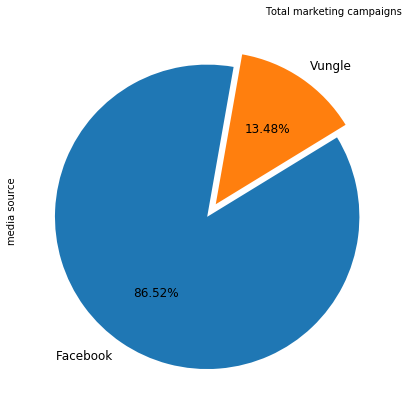

In [12]:
# Are there more Vungle Campaigns than Facebook Campaigns?

# Side table
absolut = df["media source"].value_counts().to_frame()
percent = (df["media source"].value_counts(normalize=True)*100).to_frame().rename(columns={"media source":"percent"})
out_bal = pd.concat([absolut,percent],axis=1).round(decimals=2)
display(out_bal)

# Graph
absolut.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(16,7))

# Params
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Total marketing campaigns", fontsize=10, loc="right");

---
## Q2. Which partner's campaign has generated more user installs?

,installs,percent
media source,,
Vungle,242112.0,55.09
Facebook,197357.0,44.91


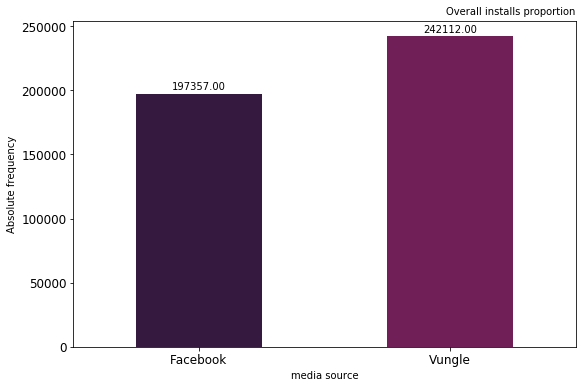

In [13]:
# Wich media source was responsible for more installs?

# Bar plot
ax = df.groupby(["media source"])["installs"].sum().plot(kind="bar", figsize=(9,6), fontsize=12, color=sns.color_palette("rocket"), table=False)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')

# Params
plt.xlabel("media source", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute frequency", fontsize=10)
plt.title("Overall installs proportion", fontsize=10, loc="right")

# side table
installs = df.groupby(["media source"])["installs"].sum().sort_values(ascending=False).to_frame()
installs["percent"] = (installs.apply(lambda x: x/x.sum())*100).round(2)
display(installs)

---
## Q3. Of how much is the overall CPI of Facebook?

In [14]:
# Filtering records from Facebook only
fb = df[["media source","cost","installs"]].copy()
fb = fb[fb["media source"] == "Facebook"].copy()
fb.head() # Printing first 5 rows

,media source,cost,installs
0,Facebook,99061.0,21382.0
3,Facebook,34746.0,55891.0
4,Facebook,31662.0,19196.0
5,Facebook,22042.0,3265.0
6,Facebook,20704.0,4917.0


In [15]:
# Calculating Costs Per Installing (Facebook)
fb.cost.sum() / fb.installs.sum()

1.9671306312925307

##### **>> The overall CPI of Facebook is $1.97**

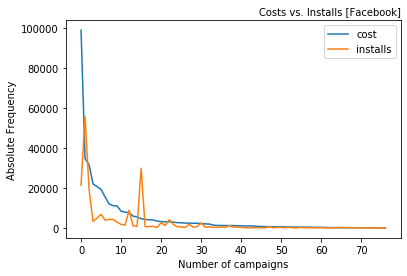

In [16]:
# Visualizing Costs vs. installs sorted by highest cost
fb = fb.reset_index().copy()
fb.drop(["index"], axis=1, inplace=True)
fb.plot.line()
plt.xlabel('Number of campaigns')
plt.ylabel('Absolute Frequency')
plt.title('Costs vs. Installs [Facebook]', fontsize=10, loc="right")
plt.show()

---

## Q4. How many Facebook campaigns have provided installs above the average?
#### >> **14 campaigns**
2563 is the average number of installs per campaign

In [17]:
# Filtering records from Facebook only
fb_mean = df[df["media source"] == "Facebook"].copy()

,installs,percent,cumsum
campaign name,,,
IMT-FB-Android-RoW2-AE-Playables-FANRW,55891.0,28.32,28.32
IMT-FB-Android-AI-WW,29949.0,15.18,43.50
IMT-FB-iOS-EN-US-AE-Playables,21382.0,10.83,54.33
IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,19196.0,9.73,64.06
IMT-FB-Android-RoW2-AE-Playables-FANIS,8894.0,4.51,68.57
IMT-FB-iOS-EN-T1-AE-Playables,6769.0,3.43,72.00
IMT-FB-Android-EN2-AE-Playables-FANRW,4917.0,2.49,74.49
IMT-FB-iOS-EN-AE-Playables - Copy,4247.0,2.15,76.64
IMT-FB-Android-DE-AE-Playables2,4227.0,2.14,78.78


Facebook average installs: 2563
Total average installs:    4937


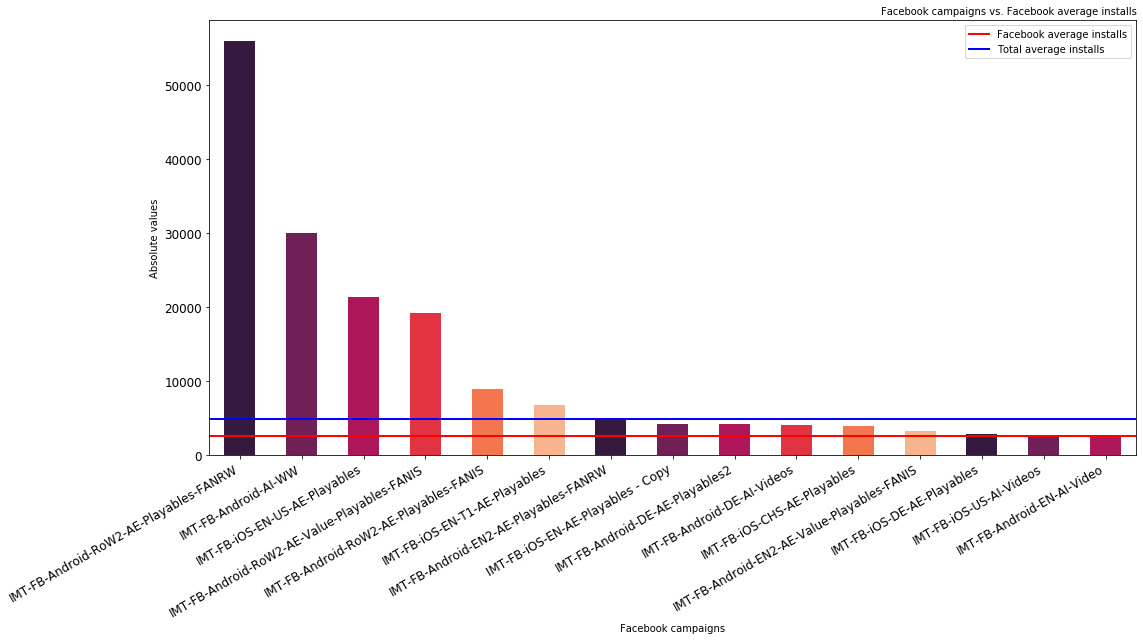

In [18]:
# Visualizing comparisons between Facebook campaings and between Facebook average campaings and total average campaigns
ax = fb_mean.groupby("campaign name")["installs"].mean().sort_values(ascending=False).head(15).plot(kind="bar", figsize=(16,9), fontsize=12, 
                                                                                                  color=sns.color_palette("rocket"), table=False)

# Params
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("Absolute values", fontsize=10)
plt.xlabel("Facebook campaigns", fontsize=10)
plt.title("Facebook campaigns vs. Facebook average installs", fontsize=10, loc="right")
plt.axhline(fb_mean.groupby("campaign name")["installs"].mean().mean(), linewidth=2, color ="r")
plt.axhline(df.groupby("campaign name")["installs"].mean().mean(), linewidth=2, color ="b")
plt.legend(('Facebook average installs', 'Total average installs'))
plt.tight_layout()

# side table
st = fb_mean.groupby("campaign name")["installs"].mean().sort_values(ascending=False).to_frame()
st["percent"] = (st.apply(lambda x: x/x.sum())*100).round(2)
st['cumsum'] = st["percent"].cumsum()
display(st.head(15))

print(f'Facebook average installs: {int(fb_mean.installs.mean())}')
print(f'Total average installs:    {int(df.installs.mean())}')

---

## Q5. Of how much is the overall CPI of Vungle?

In [19]:
# Filtering records from Vungle only
vun = df[["media source","cost","installs"]].copy()
vun = vun[vun["media source"] == "Vungle"].copy()
vun.head() # Printing first 5 rows

,media source,cost,installs
1,Vungle,38479.0,50858.0
2,Vungle,38209.0,41000.0
9,Vungle,14645.0,16358.0
10,Vungle,13959.0,17876.0
11,Vungle,13819.0,18784.0


In [20]:
# Calculating Costs Per Installing (Vungle)
vun.cost.sum() / vun.installs.sum()

0.7351143272535026

##### **>> The overall CPI of Vungle is $0.74**

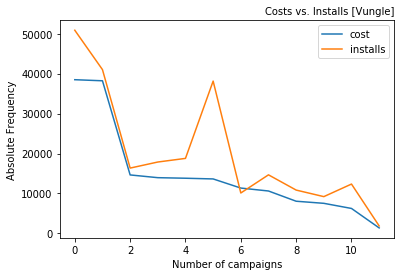

In [21]:
# Visualizing Costs vs. installs sorted by highest cost
vun.reset_index(drop=True, inplace=True)
vun.plot.line()
plt.xlabel('Number of campaigns')
plt.ylabel('Absolute Frequency')
plt.title('Costs vs. Installs [Vungle]', fontsize=10, loc="right")
plt.show()

---

## Q6. How many Vungle campaigns have provided installs above the average?
#### >> **3 campaigns**
20176 is the average number of installs per campaign

In [22]:
# Filtering records from Vungle only
vn_mean = df[df["media source"] == "Vungle"].copy()

,installs,percent,cumsum
campaign name,,,
IMT-Vungle-Android-US,50858.0,21.01,21.01
IMT-Vungle-iOS-CN,41000.0,16.93,37.94
IMT-Vungle-Android-T2,38131.0,15.75,53.69
IMT-Vungle-iOS-CA,18784.0,7.76,61.45
IMT-Vungle-iOS-UK,17876.0,7.38,68.83
IMT-Vungle-iOS-AU,16358.0,6.76,75.59
IMT-Vungle-Android-UK,14668.0,6.06,81.65
IMT-Vungle-iOS-T2,12360.0,5.11,86.76
IMT-Vungle-iOS-DE,10855.0,4.48,91.24


Vungle average installs: 20176
Total average installs:   4937


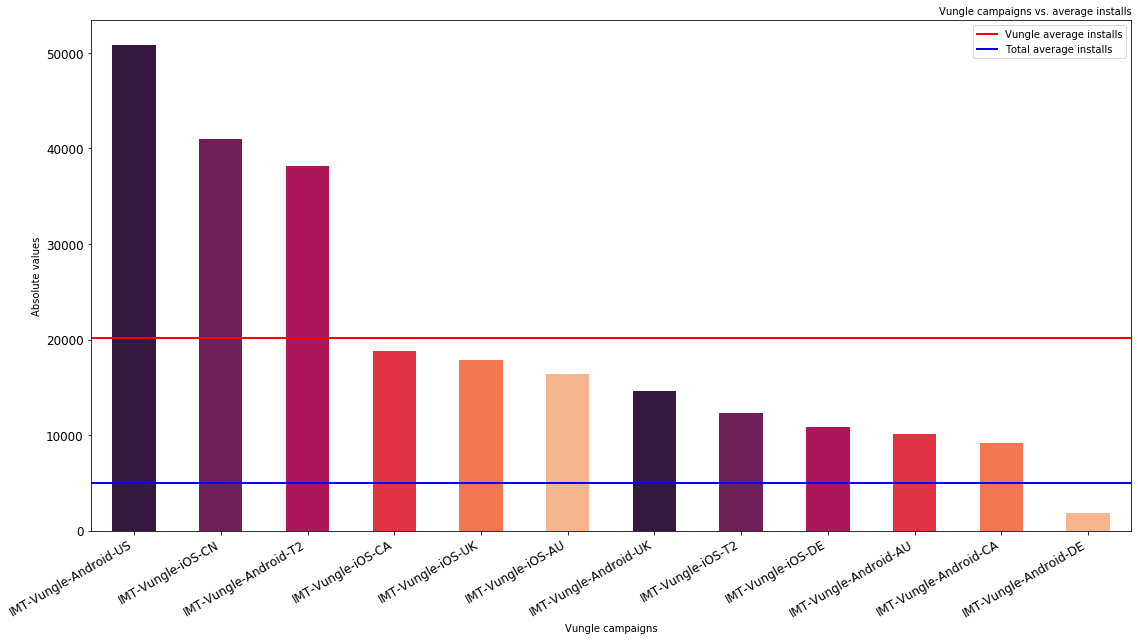

In [23]:
# Visualizing comparisons between Vungle campaings and between Vungle average campaings and total average campaigns
ax = vn_mean.groupby("campaign name")["installs"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(16,9), fontsize=12, 
                                                                                                  color=sns.color_palette("rocket"), table=False)

# Params
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("Absolute values", fontsize=10)
plt.xlabel("Vungle campaigns", fontsize=10)
plt.title("Vungle campaigns vs. average installs", fontsize=10, loc="right")
plt.axhline(vn_mean.groupby("campaign name")["installs"].mean().mean(), linewidth=2, color ="r")
plt.axhline(df.groupby("campaign name")["installs"].mean().mean(), linewidth=2, color ="b")
plt.legend(('Vungle average installs', 'Total average installs'))
plt.tight_layout()

# side table
st = vn_mean.groupby("campaign name")["installs"].mean().sort_values(ascending=False).to_frame()
st["percent"] = (st.apply(lambda x: x/x.sum())*100).round(2)
st['cumsum'] = st["percent"].cumsum()
display(st.head(10))

print(f'Vungle average installs: {int(vn_mean.installs.mean())}')
print(f'Total average installs:   {int(df.installs.mean())}')

---

## Q7. Do both platforms have similar performance (cost vs. install)?

In [24]:
# Concatenating both Facebook + Vungle datasets
cpi2brand = pd.concat([fb, vun])

,cost,installs
media source,,
Facebook,388227.0,197357.0
Vungle,177980.0,242112.0


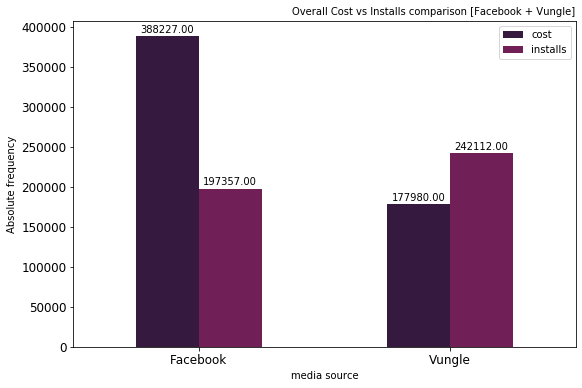

In [25]:
# Bar plot
ax = cpi2brand.groupby(["media source"])[["cost","installs"]].sum().plot(kind="bar", figsize=(9,6), fontsize=12, color=sns.color_palette("rocket"), table=False)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')

# Params
plt.xlabel("media source", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute frequency", fontsize=10)
plt.title("Overall Cost vs Installs comparison [Facebook + Vungle]", fontsize=10, loc="right")

# side table
installs = cpi2brand.groupby(["media source"])[["cost","installs"]].sum().sort_values(by="cost", ascending=False)
display(installs)

---
## Q8. Of how much is the overall D30  ROAS of Facebook?

In [26]:
# Selecting Facebook segment dataset
fb_d30 = df[["media source","cost","d30 total revenue"]].copy()
fb_d30 = fb_d30[fb_d30["media source"] == "Facebook"].copy()
fb_d30.head()

,media source,cost,d30 total revenue
0,Facebook,99061.0,74185.0
3,Facebook,34746.0,29437.0
4,Facebook,31662.0,26026.0
5,Facebook,22042.0,19517.0
6,Facebook,20704.0,15087.0


In [27]:
# Calculating Return On Advert Spend (Facebook) over 30 days
fb_d30["d30 total revenue"].sum() / fb_d30.cost.sum()

0.7265414306578368

##### **>> The overall D30 ROAS of Facebook is 72.65 %**

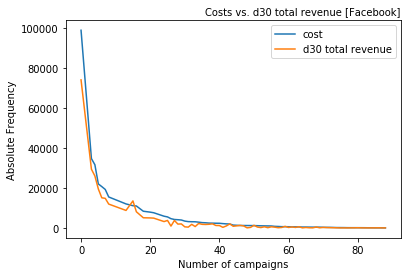

In [28]:
# Visualizing Costs vs. installs over 30 days sorted by highest cost (Facebook)
fb_d30.plot.line()
plt.xlabel('Number of campaigns')
plt.ylabel('Absolute Frequency')
plt.title('Costs vs. d30 total revenue [Facebook]', fontsize=10, loc="right")
plt.show()

---
## Q9. Of how much is the overall D30 ROAS of Vungle?

In [29]:
# Selecting Vungle' segment dataset over 30 days
vun_d30 = df[["media source","cost","d30 total revenue"]].copy()
vun_d30 = vun_d30[vun_d30["media source"] == "Vungle"].copy()
vun_d30.head()

,media source,cost,d30 total revenue
1,Vungle,38479.0,26216.0
2,Vungle,38209.0,55175.0
9,Vungle,14645.0,11386.0
10,Vungle,13959.0,13614.0
11,Vungle,13819.0,11344.0


In [30]:
# Calculating Return On Advert Spend (Vungle) over 30 days
vun_d30["d30 total revenue"].sum() / vun_d30.cost.sum()

0.9287728958309922

##### **>> The overall D30 ROAS of Vungle is 92.88 %**

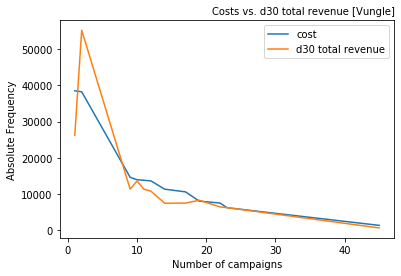

In [31]:
# Visualizing Costs vs. installs over 30 days sorted by highest cost (Vungle)
vun_d30.plot.line()
plt.xlabel('Number of campaigns')
plt.ylabel('Absolute Frequency')
plt.title('Costs vs. d30 total revenue [Vungle]', fontsize=10, loc="right")
plt.show()

---
## Q10. Overall Cost vs. D30_ROAS comparison of both platforms

In [32]:
# Concatenating both Facebook + Vungle datasets
roas2brand = pd.concat([fb_d30, vun_d30])

,cost,d30 total revenue
media source,,
Facebook,388227.0,282063.0
Vungle,177980.0,165303.0


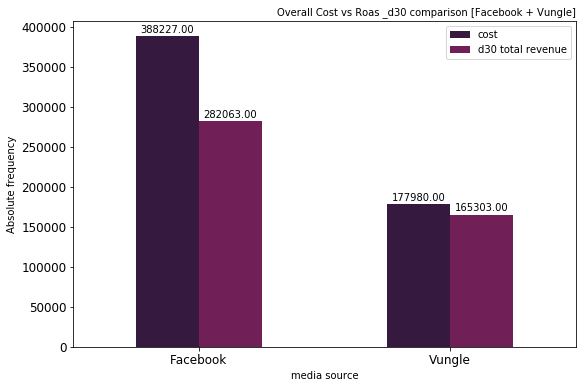

In [33]:
# Bar plot
ax = roas2brand.groupby(["media source"])[["cost","d30 total revenue"]].sum().plot(kind="bar", figsize=(9,6), fontsize=12, color=sns.color_palette("rocket"), table=False)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')

# Params
plt.xlabel("media source", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute frequency", fontsize=10)
plt.title("Overall Cost vs Roas _d30 comparison [Facebook + Vungle]", fontsize=10, loc="right")

# side table
roas = roas2brand.groupby(["media source"])[["cost","d30 total revenue"]].sum().sort_values(by="cost", ascending=False)
display(roas)

In [34]:
df.head()

,media source,campaign name,cost,installs,d01 total revenue,d03 total revenue,d07 total revenue,d30 total revenue,cpi,d01_roas,d03_roas,d07_roas,d30_roas
0,Facebook,IMT-FB-iOS-EN-US-AE-Playables,99061.0,21382.0,10404.0,25694.0,39231.0,74185.0,4.632916,0.105026,0.259376,0.396029,0.748882
1,Vungle,IMT-Vungle-Android-US,38479.0,50858.0,3632.0,9679.0,15095.0,26216.0,0.756597,0.094389,0.251540,0.392292,0.681307
2,Vungle,IMT-Vungle-iOS-CN,38209.0,41000.0,8537.0,20598.0,31850.0,55175.0,0.931927,0.223429,0.539088,0.833573,1.444032
3,Facebook,IMT-FB-Android-RoW2-AE-Playables-FANRW,34746.0,55891.0,4360.0,10565.0,16080.0,29437.0,0.621674,0.125482,0.304064,0.462787,0.847205
4,Facebook,IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,31662.0,19196.0,3952.0,9824.0,14728.0,26026.0,1.649406,0.124818,0.310277,0.465163,0.821995


---
## Q11. Is there any correlation between the stages during the campaigns?

Displaying correlations heatmap (Pearson method)

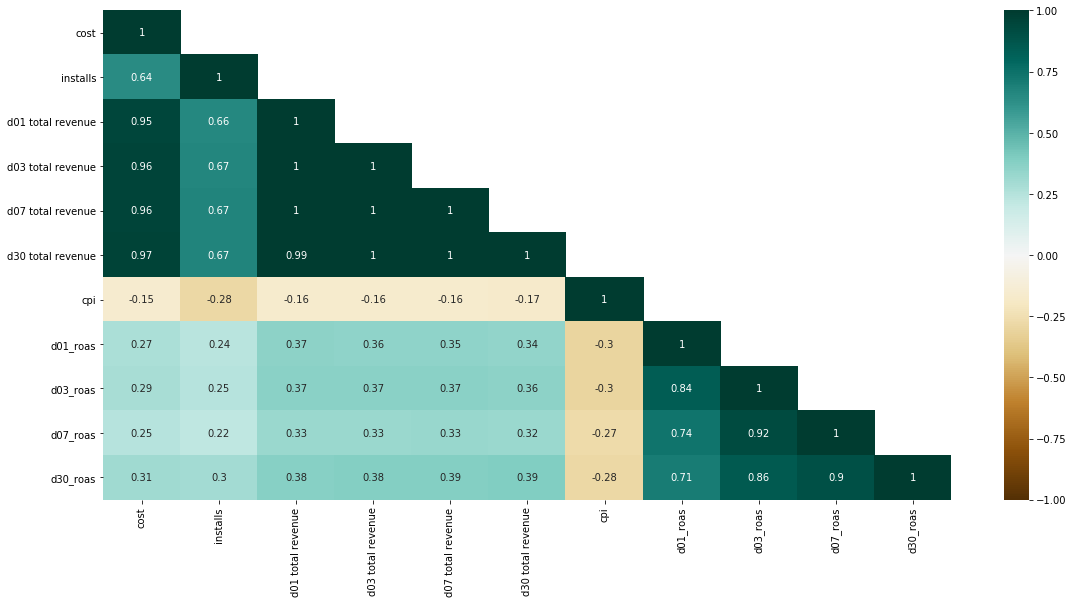

In [35]:
# Display correlation graph (Perason correlation method)
mask = np.triu(df.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, square=False, cmap="BrBG", mask=mask);

In [36]:
# Calculating corr. coef. between ROAS 7 days and 30 days
df['d07_roas'].corr(df['d30_roas'])

0.9037410337635488

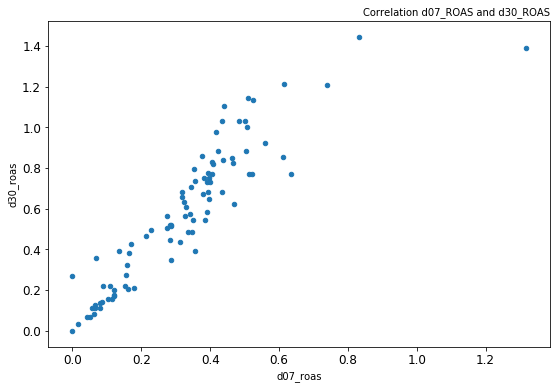

In [37]:
# Display correlations between ROAS on the 7th and 30th days

df.plot(x="d07_roas", y="d30_roas", kind="scatter", figsize=(9,6), fontsize=12)
plt.title("Correlation d07_ROAS and d30_ROAS", fontsize=10, loc="right")
plt.xticks(rotation=0, horizontalalignment="center");

##### **>> d07_roas has a positive and very strong correlation (Pearson method) with d30_roas of 90.37 %**

---
## Q12. The campaigns with the highest ROAS have the highest Total Revenue?

### **d01_ROAS**

In [38]:
# Selecting columns to work with
high_d01 = df[["campaign name","cost","d01 total revenue","d01_roas"]].copy()
high_d01.head() # displaying the first 5 rows

,campaign name,cost,d01 total revenue,d01_roas
0,IMT-FB-iOS-EN-US-AE-Playables,99061.0,10404.0,0.105026
1,IMT-Vungle-Android-US,38479.0,3632.0,0.094389
2,IMT-Vungle-iOS-CN,38209.0,8537.0,0.223429
3,IMT-FB-Android-RoW2-AE-Playables-FANRW,34746.0,4360.0,0.125482
4,IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,31662.0,3952.0,0.124818


In [39]:
# Assigning maximum Return On Advert Spend 30 days and max total revenue 30 days
d01_roas_max = high_d01['d01_roas'].max()
d01_total_max = high_d01['d01 total revenue'].max()

In [40]:
print("""
Campaign with the highest d01_roas:
""")
high_d01.loc[high_d01['d01_roas'] == d01_roas_max, 'campaign name']


Campaign with the highest d01_roas:



59    IMT-FB-Android-RoW2-AE-Playables-Feed
Name: campaign name, dtype: object

In [41]:
print("""
Campaign with the highest d01 total revenue:
""")
high_d01.loc[high_d01['d01 total revenue'] == d01_total_max, 'campaign name']


Campaign with the highest d01 total revenue:



0    IMT-FB-iOS-EN-US-AE-Playables
Name: campaign name, dtype: object

##### **>> The campaigns with the highest d01_roas and the highest d01 total revenue don't match.**

### **d03_ROAS**

In [42]:
# Selecting columns to work with
high_d03 = df[["campaign name","cost","d03 total revenue","d03_roas"]].copy()
high_d03.head() # displaying the first 5 rows

,campaign name,cost,d03 total revenue,d03_roas
0,IMT-FB-iOS-EN-US-AE-Playables,99061.0,25694.0,0.259376
1,IMT-Vungle-Android-US,38479.0,9679.0,0.251540
2,IMT-Vungle-iOS-CN,38209.0,20598.0,0.539088
3,IMT-FB-Android-RoW2-AE-Playables-FANRW,34746.0,10565.0,0.304064
4,IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,31662.0,9824.0,0.310277


In [43]:
# Assigning maximum Return On Advert Spend 30 days and max total revenue 30 days
d03_roas_max = high_d03['d03_roas'].max()
d03_total_max = high_d03['d03 total revenue'].max()

In [44]:
print("""
Campaign with the highest d01_roas:
""")
high_d03.loc[high_d03['d03_roas'] == d03_roas_max, 'campaign name']


Campaign with the highest d01_roas:



86    IMT-FB-Android-RoW2-AE-Value-Video-FANIS
Name: campaign name, dtype: object

In [45]:
print("""
Campaign with the highest d01 total revenue:
""")
high_d03.loc[high_d03['d03 total revenue'] == d03_total_max, 'campaign name']


Campaign with the highest d01 total revenue:



0    IMT-FB-iOS-EN-US-AE-Playables
Name: campaign name, dtype: object

##### **>> The campaigns with the highest d03_roas and the highest d03 total revenue don't match.**

### **d07_ROAS**

In [46]:
# Selecting columns to work with
high_d07 = df[["campaign name","cost","d07 total revenue","d07_roas"]].copy()
high_d07.head() # displaying the first 5 rows

,campaign name,cost,d07 total revenue,d07_roas
0,IMT-FB-iOS-EN-US-AE-Playables,99061.0,39231.0,0.396029
1,IMT-Vungle-Android-US,38479.0,15095.0,0.392292
2,IMT-Vungle-iOS-CN,38209.0,31850.0,0.833573
3,IMT-FB-Android-RoW2-AE-Playables-FANRW,34746.0,16080.0,0.462787
4,IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,31662.0,14728.0,0.465163


In [47]:
# Assigning maximum Return On Advert Spend 30 days and max total revenue 30 days
d07_roas_max = high_d07['d07_roas'].max()
d07_total_max = high_d07['d07 total revenue'].max()

In [48]:
print("""
Campaign with the highest d30_roas:
""")
high_d07.loc[high_d07['d07_roas'] == d07_roas_max, 'campaign name']


Campaign with the highest d30_roas:



86    IMT-FB-Android-RoW2-AE-Value-Video-FANIS
Name: campaign name, dtype: object

In [49]:
print("""
Campaign with the highest d30 total revenue:
""")
high_d07.loc[high_d07['d07 total revenue'] == d07_total_max, 'campaign name']


Campaign with the highest d30 total revenue:



0    IMT-FB-iOS-EN-US-AE-Playables
Name: campaign name, dtype: object

##### **>> The campaigns with the highest d07_roas and the highest d07 total revenue don't match.**

### **d30_ROAS**

In [50]:
# Selecting columns to work with
high_d30 = df[["campaign name","cost","d30 total revenue","d30_roas"]].copy()
high_d30.head() # displaying the first 5 rows

,campaign name,cost,d30 total revenue,d30_roas
0,IMT-FB-iOS-EN-US-AE-Playables,99061.0,74185.0,0.748882
1,IMT-Vungle-Android-US,38479.0,26216.0,0.681307
2,IMT-Vungle-iOS-CN,38209.0,55175.0,1.444032
3,IMT-FB-Android-RoW2-AE-Playables-FANRW,34746.0,29437.0,0.847205
4,IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,31662.0,26026.0,0.821995


In [51]:
# Assigning maximum Return On Advert Spend 30 days and max total revenue 30 days
d30_roas_max = high_d30['d30_roas'].max()
d30_total_max = high_d30['d30 total revenue'].max()

In [52]:
print("""
Campaign with the highest d30_roas:
""")
high_d30.loc[high_d30['d30_roas'] == d30_roas_max, 'campaign name']


Campaign with the highest d30_roas:



2    IMT-Vungle-iOS-CN
Name: campaign name, dtype: object

In [53]:
print("""
Campaign with the highest d30 total revenue:
""")
high_d30.loc[high_d30['d30 total revenue'] == d30_total_max, 'campaign name']


Campaign with the highest d30 total revenue:



0    IMT-FB-iOS-EN-US-AE-Playables
Name: campaign name, dtype: object

##### **>> The campaigns with the highest d30_roas and the highest d30 total revenue don't match.**

---
## Q13. Do the campaigns with a ROAS on DAY_1 under 10% break-even after the first month?

In [54]:
d01_on = df.iloc[:75,:].copy()
d01_down = df.iloc[76:,:].copy()
d01_roas_under10 = pd.concat([d01_on,d01_down])

In [55]:
# Selecting campaigns segment of ROAS d01 under 10%
d01_roas_under10 = d01_roas_under10[d01_roas_under10["d01_roas"] < 0.10].copy()

In [56]:
# Filtering campaigns segment in wihch "d30 total revenue" is higher than its cost
d01_roas_under10[d01_roas_under10["d30 total revenue"] > d01_roas_under10["cost"]]

,media source,campaign name,cost,installs,d01 total revenue,d03 total revenue,d07 total revenue,d30 total revenue,cpi,d01_roas,d03_roas,d07_roas,d30_roas
46,Facebook,IMT-FB-iOS-EN-US-FANIS-AE-Playables-LAL(Value),1222.0,294.0,115.0,393.0,529.0,1260.0,4.156463,0.094108,0.321604,0.432897,1.031097
50,Facebook,IMT-FB-Android-JP-AE-Playables-FANRW,1178.0,383.0,92.0,298.0,520.0,1303.0,3.075718,0.078098,0.252971,0.441426,1.106112
63,Facebook,IMT-FB-iOS-mROAS-Test0.1,504.0,74.0,8.0,119.0,257.0,577.0,6.810811,0.015873,0.236111,0.509921,1.144841


##### **>> The 3 above campaings did break even after 30 days**

---
## Q14. Is it safe to assume the campaigns with a ROAS on DAY_7 higher than 70% will break even after 30 days?

In [57]:
# Selecting campaigns segment of ROAS 7 days above 70% - 30 days
d07_roas_up70 = df[df["d07_roas"] > 0.70].copy()
d07_roas_up70.head()

,media source,campaign name,cost,installs,d01 total revenue,d03 total revenue,d07 total revenue,d30 total revenue,cpi,d01_roas,d03_roas,d07_roas,d30_roas
2,Vungle,IMT-Vungle-iOS-CN,38209.0,41000.0,8537.0,20598.0,31850.0,55175.0,0.931927,0.223429,0.539088,0.833573,1.444032
59,Facebook,IMT-FB-Android-RoW2-AE-Playables-Feed,630.0,600.0,174.0,304.0,465.0,760.0,1.050000,0.276190,0.482540,0.738095,1.206349
86,Facebook,IMT-FB-Android-RoW2-AE-Value-Video-FANIS,41.0,14.0,7.0,32.0,54.0,57.0,2.928571,0.170732,0.780488,1.317073,1.390244


In [58]:
# Filtering campaigns segment in which "d30 total revenue" is lower than its cost
(d07_roas_up70[d07_roas_up70["d30 total revenue"] < d07_roas_up70["cost"]]).values.any()

False

##### **>> All Campaigns with a D07 ROAS higher than 70% did break even after 30 days**

---
## Q15. Monitoring the overall ROAS evolution of both platforms

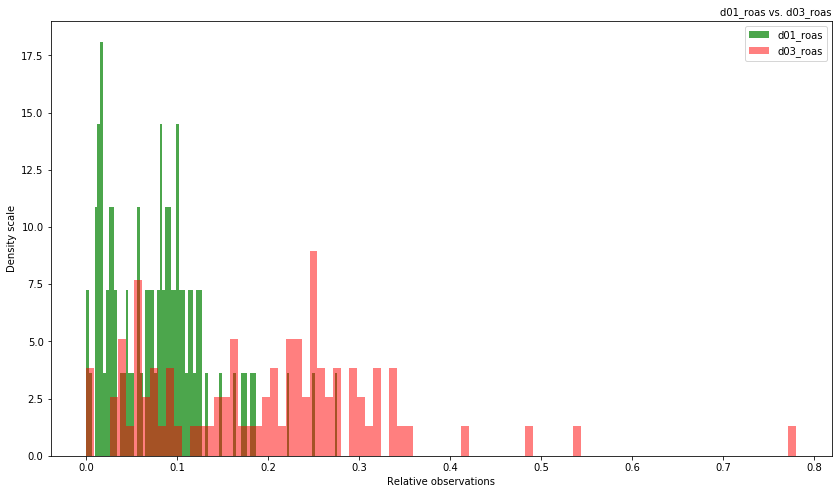

In [59]:
# Display histogram: d01_roas vs d03_roas evolution comparison

d01_roas = df.d01_roas
d03_roas = df.d03_roas

d01 = np.array(d01_roas)
d03 = np.array(d03_roas)

np.warnings.filterwarnings('ignore')

plt.figure(figsize=(14,8))
plt.hist(d01, bins=89, density=True, color="g", alpha = 0.7, label="d01_roas")
plt.hist(d03, bins=89, density=True, color="r", alpha = 0.5, label="d03_roas")

plt.legend(loc='upper right')

plt.xlabel("Relative observations", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Density scale", fontsize=10)
plt.title("d01_roas vs. d03_roas", fontsize=10, loc="right")

plt.show()

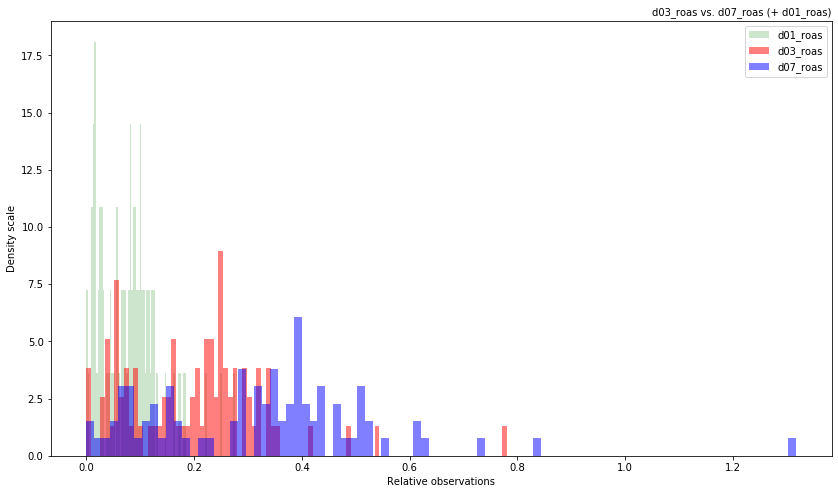

In [60]:
# Display histogram: d01_roas vs d03_roas evolution comparison

d03_roas = df.d03_roas
d07_roas = df.d07_roas

d03 = np.array(d03_roas)
d07 = np.array(d07_roas)


np.warnings.filterwarnings('ignore')

plt.figure(figsize=(14,8))
plt.hist(d01, bins=89, density=True, color="g", alpha = 0.2, label="d01_roas")
plt.hist(d03, bins=89, density=True, color="r", alpha = 0.5, label="d03_roas")
plt.hist(d07, bins=89, density=True, color="b", alpha = 0.5, label="d07_roas")

plt.legend(loc='upper right')

plt.xlabel("Relative observations", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Density scale", fontsize=10)
plt.title("d03_roas vs. d07_roas (+ d01_roas)", fontsize=10, loc="right")

plt.show()

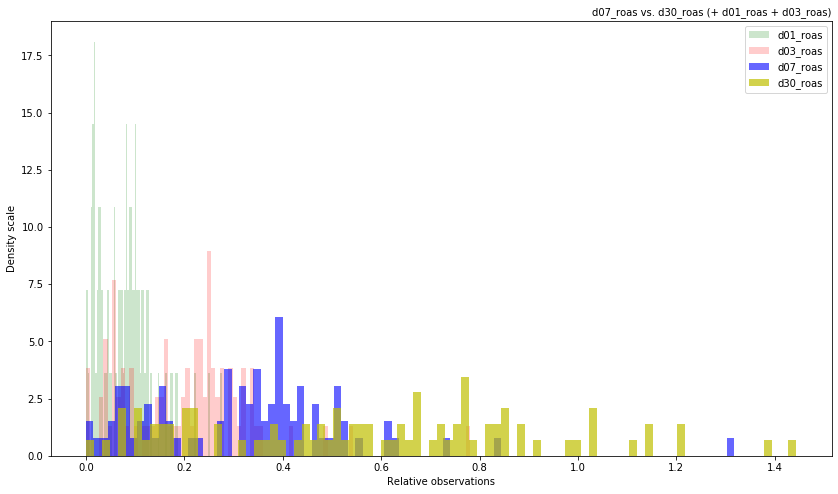

In [61]:
# Display histogram: d01_roas vs d03_roas evolution comparison

d01_roas = df.d01_roas
d03_roas = df.d03_roas
d07_roas = df.d07_roas
d30_roas = df.d30_roas

d01 = np.array(d01_roas)
d03 = np.array(d03_roas)
d07 = np.array(d07_roas)
d30 = np.array(d30_roas)

np.warnings.filterwarnings('ignore')

plt.figure(figsize=(14,8))
plt.hist(d01, bins=89, density=True, color="g", alpha = 0.2, label="d01_roas")
plt.hist(d03, bins=89, density=True, color="r", alpha = 0.2, label="d03_roas")
plt.hist(d07, bins=89, density=True, color="b", alpha = 0.6, label="d07_roas")
plt.hist(d30, bins=89, density=True, color="y", alpha = 0.7, label="d30_roas")

plt.legend(loc='upper right')

plt.xlabel("Relative observations", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Density scale", fontsize=10)
plt.title("d07_roas vs. d30_roas (+ d01_roas + d03_roas)", fontsize=10, loc="right")

plt.show()

---
---

# Attachments
### Dataset

In [62]:
# Ordering columns to display
df = df[["media source","campaign name","cost","installs","cpi",
         "d01 total revenue","d03 total revenue","d07 total revenue",
         "d30 total revenue","d01_roas","d03_roas","d07_roas","d30_roas"]].copy()

pd.set_option('display.max_rows', 120) # Display all rows

df # display the entire dataset

,media source,campaign name,cost,installs,cpi,d01 total revenue,d03 total revenue,d07 total revenue,d30 total revenue,d01_roas,d03_roas,d07_roas,d30_roas
0,Facebook,IMT-FB-iOS-EN-US-AE-Playables,99061.0,21382.0,4.632916,10404.0,25694.0,39231.0,74185.0,0.105026,0.259376,0.396029,0.748882
1,Vungle,IMT-Vungle-Android-US,38479.0,50858.0,0.756597,3632.0,9679.0,15095.0,26216.0,0.094389,0.251540,0.392292,0.681307
2,Vungle,IMT-Vungle-iOS-CN,38209.0,41000.0,0.931927,8537.0,20598.0,31850.0,55175.0,0.223429,0.539088,0.833573,1.444032
3,Facebook,IMT-FB-Android-RoW2-AE-Playables-FANRW,34746.0,55891.0,0.621674,4360.0,10565.0,16080.0,29437.0,0.125482,0.304064,0.462787,0.847205
4,Facebook,IMT-FB-Android-RoW2-AE-Value-Playables-FANIS,31662.0,19196.0,1.649406,3952.0,9824.0,14728.0,26026.0,0.124818,0.310277,0.465163,0.821995
5,Facebook,IMT-FB-Android-EN2-AE-Value-Playables-FANIS,22042.0,3265.0,6.750995,2436.0,7449.0,11112.0,19517.0,0.110516,0.337946,0.504128,0.885446
6,Facebook,IMT-FB-Android-EN2-AE-Playables-FANRW,20704.0,4917.0,4.210698,1812.0,4994.0,8081.0,15087.0,0.087519,0.241209,0.390311,0.728700
7,Facebook,IMT-FB-iOS-EN-T1-AE-Playables,19275.0,6769.0,2.847540,1876.0,4772.0,7812.0,14826.0,0.097328,0.247575,0.405292,0.769183
8,Facebook,IMT-FB-iOS-CHS-AE-Playables,15510.0,3886.0,3.991251,2281.0,5370.0,7943.0,11948.0,0.147066,0.346228,0.512121,0.770342
9,Vungle,IMT-Vungle-iOS-AU,14645.0,16358.0,0.895281,1351.0,3603.0,5761.0,11386.0,0.092250,0.246023,0.393377,0.777467


---

Report concluded.